In [1]:
# import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 

In [2]:
# Read the "Heart.csv" dataset and take a quick look
heart = pd.read_csv('Heart.csv')
heart = heart.drop('Unnamed: 0', axis=1)

# Force the response into a binary indicator:
heart['AHD'] = 1 * (heart['AHD'] == "Yes")
print(heart.shape)

(303, 14)


In [3]:
# Split into train and validation
heart_train, heart_val = train_test_split(heart, train_size=0.75, random_state=109)
print(heart_train.shape, heart_val.shape)

(227, 14) (76, 14)


In [4]:
x_train = heart_train[['Age']]
y_train = heart_train['AHD']

In [5]:
knn20 = KNeighborsClassifier(n_neighbors=20)

# Fit to the data
knn20.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [6]:
yhat20_class = knn20.predict(x_train)
yhat20_prob = knn20.predict_proba(x_train)

# Print out the first 10 predictions for the actual data
print(yhat20_class[:10])
print(yhat20_prob[:10])

[0 0 1 1 1 0 1 1 0 1]
[[0.7  0.3 ]
 [0.8  0.2 ]
 [0.4  0.6 ]
 [0.25 0.75]
 [0.3  0.7 ]
 [0.7  0.3 ]
 [0.45 0.55]
 [0.3  0.7 ]
 [0.7  0.3 ]
 [0.35 0.65]]


In [11]:
logit1 = LogisticRegression(penalty=None, max_iter=1000)

# Fit the model using the training set
logit1.fit(x_train, y_train)

# Get the coefficient estimates
print("Logistic Regression Estimated Betas (B0,B1):", logit1.intercept_, logit1.coef_)

Logistic Regression Estimated Betas (B0,B1): [-3.32616703] [[0.05933142]]


In [12]:
# Define the equivalent validation variables from `heart_val`
x_val = heart_val[['Age']]
y_val = heart_val['AHD']

In [13]:
knn20_train_accuracy = knn20.score(x_train, y_train)
knn20_val_accuracy = knn20.score(x_val, y_val)

logit_train_accuracy = logit1.score(x_train, y_train)
logit_val_accuracy = logit1.score(x_val, y_val)

# Print the accuracies below
print("k-NN Train & Validation Accuracy:", knn20_train_accuracy, knn20_val_accuracy)
print("Logistic Train & Validation Accuracy:", logit_train_accuracy, logit_val_accuracy)

k-NN Train & Validation Accuracy: 0.6299559471365639 0.5526315789473685
Logistic Train & Validation Accuracy: 0.6387665198237885 0.6052631578947368


C:\Users\mythr\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\mythr\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\mythr\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\mythr\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


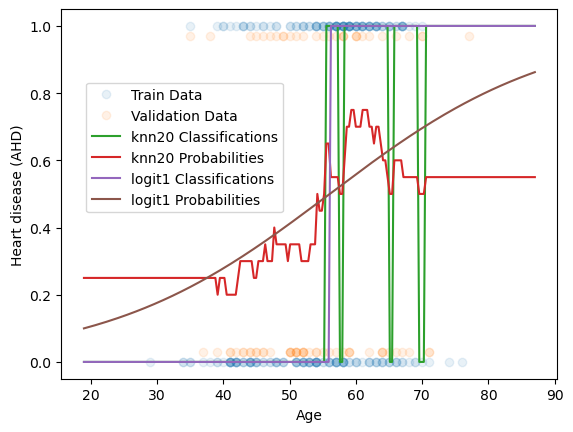

In [14]:
# Set-up the dummy x for plotting: we extend it a little bit beyond the range of observed values 
x_dummy = np.linspace(np.min(heart[['Age']]) - 10, np.max(heart[['Age']]) + 10, 200)

# be careful in pulling off only the correct column of the probability calculations: use `[:,1]`
yhat_class_knn20 = knn20.predict(x_dummy.reshape(-1, 1))
yhat_prob_knn20 = knn20.predict_proba(x_dummy.reshape(-1, 1))[:, 1]

yhat_class_logit = logit1.predict(x_dummy.reshape(-1, 1))
yhat_prob_logit = logit1.predict_proba(x_dummy.reshape(-1, 1))[:, 1]

# Plot the observed data. Note: we offset the validation points to make them more clearly differentiated from train
plt.plot(x_train, y_train, 'o', alpha=0.1, label='Train Data')
plt.plot(x_val, 0.94 * y_val + 0.03, 'o', alpha=0.1, label='Validation Data')

# Plot the predictions
plt.plot(x_dummy, yhat_class_knn20, label='knn20 Classifications')
plt.plot(x_dummy, yhat_prob_knn20, label='knn20 Probabilities')
plt.plot(x_dummy, yhat_class_logit, label='logit1 Classifications')
plt.plot(x_dummy, yhat_prob_logit, label='logit1 Probabilities')

# Put the lower-left part of the legend 5% to the right along the x-axis, and 45% up along the y-axis
plt.legend(loc=(0.05, 0.45))

plt.xlabel("Age")
plt.ylabel("Heart disease (AHD)")

plt.show()